Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Método de colocación: Implementación numérica

En este notebook vamos a presentar una implementación numérica del
método de colocación.

En este caso, se calculó el residual de forma análitica con anterioridad
y se formó la matriz para el sistema de ecuaciones resultante.

## Problema a resolver

Consideremos la siguiente ecuación diferencial

$$\frac{d^2u}{dx^2} = -4 \pi^2 \sin(2 \pi x) \, , $$

con condiciones de frontera $u(0)=u(1)=0$.

La solución a este problema de valores de la frontera es

$$u_e(x) = \sin (2 \pi x)\, .$$

## Función de aproximación propuesta

En este caso, hacemos uso de una función de aproximación
polinómica

$$u_N(x) = \sum_{i=0}^N c_i \phi_i(x) = x (1-x) \sum_{i=0}^N c_i x^i\, ,$$

en donde vemos que esta función satisface las condiciones de frontera.

El residual estaría dado por

$$R(x) = \frac{d^2 u_N}{dx^2} + 4\pi^2\sin(2\pi x)\, ,$$

o


$$R(x) = \sum_{i=0}^N c_i \frac{d^2 \phi_i}{dx^2} + 4\pi^2\sin(2\pi x) \, .$$

El sistema de ecuaciones resulta de imponer

$$R(x_j) = 0\quad \forall x_j\, ,$$

o

$$\sum_{i=0}^N c_i \frac{d^2 \phi_i(x_j)}{dx^2}  = - 4\pi^2\sin(2\pi x_j) \quad \forall x_j\, .$$

## Ejemplo computacional

In [1]:
# Esto permite tener gráficos interactivos en
# el caso de correrse en Google Colab
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
if 'google.colab' in str(get_ipython()):
    style = "https://raw.githubusercontent.com/nicoguaro/pinns_mapi-3/main/notebooks/clean.mplstyle"
else:
    style = "./clean.mplstyle"
plt.style.use(style)

El sistema de ecuaciones es de la forma

$$[A]\{x\} = \{b\}\, ,$$

y para esta ecuación diferencial las componentes están
dadas por

$$A_{ji} = i x_j^{i - 2}[(i + 1)x_j - i + 1]\, ,$$

y

$$b_j = - 4 \pi^2 \sin(2\pi x_j)\, .$$

In [5]:
def coloc_mat(pts):
    """Genera la matriz de colocación

    Parámetros
    ----------
    pts : ndarray
        Puntos de colocación.

    Retorna
    -------
    mat : ndarray
        Matriz de colocación.
    """
    pts = np.asarray(pts)
    N = pts.shape[0]
    mat = np.zeros((N, N))
    for row, pt in enumerate(pts):
        for col in range(N):
            k = col + 1
            mat[row, col] = k*pt**(k - 2)*((k + 1)*pt - k + 1)
    return mat


def eval_sol(x_eval, coefs):
    sol = np.zeros_like(x_eval)
    for k, c in enumerate(coefs):
        sol += c * x_eval * (x_eval - 1) * x_eval**k
    return sol

In [6]:
N = 8
pts = np.linspace(0, 1, N + 2)
mat = coloc_mat(pts[1:-1])
f = lambda x: -4*np.pi**2*np.sin(2*np.pi*x)
rhs = [f(pt) for pt in pts[1:-1]]

In [7]:
coefs = np.linalg.solve(mat, rhs)

In [8]:
x_eval = np.linspace(0, 1, 101)
y_eval = eval_sol(x_eval, coefs)

Text(0, 0.5, 'u(x)')

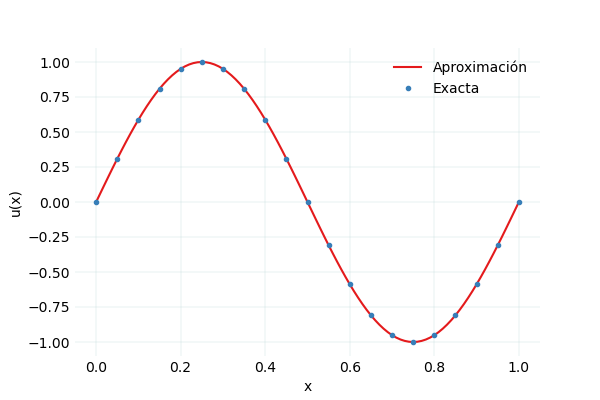

In [9]:
plt.figure()
plt.plot(x_eval, np.sin(2*np.pi*x_eval))
plt.plot(x_eval, y_eval, ".", markevery=5)
plt.legend(['Aproximación', 'Exacta'])
plt.xlabel("x")
plt.ylabel("u(x)")